## Develop a Deep Convolutional Neural Network Step-by-Step to Classify Photographs of Dogs and Cats
The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat.

Although the problem sounds simple, it was only effectively addressed in the last few years using deep learning convolutional neural networks. While the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification from scratch.

#### Convolutional Neural Network to determine wheather the picture is of a dog or a cat.

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

#### Part 1 - Data Preprocessing

In [2]:
#Preprocessing the Training set
#Here size of image is reduced to 64x64, batch of images is kept as 32 and class is defined as 'binary'.
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [3]:
#Preprocessing the Test set
#Applying same scale as training set, but only feature scaling is applied. image augmentation is avoided to prevent leakage of testing data.
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 2023 images belonging to 2 classes.


#### Part 2 - Building the CNN

In [4]:
#Initialising the CNN
model = Sequential()

#### It is done in 5 steps:

* Convolution
* Polling
* Flattening
* Full Connection
* Output Layer

In [6]:
#STEP 1: ADDING CONVOLUTIONAL LAYER
model.add(Conv2D(32, (3, 3), input_shape = (64, 64,3), activation = 'relu'))

#Note that in image augmentation we kept the image size as 64x64, therefore input_shape should also be same [64,64,3] (here 3 signifies that this is a colorful image (R,G,B))
#Activation function relu is applied to decrease any linearity that might have arrised while applying filters.

In [7]:
#STEP 2: APPLYING MAX POLLING
model.add(MaxPooling2D(pool_size = (2, 2)))

In [8]:
#Adding 2nd Convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [9]:
#STEP 3: FLATTENING
model.add(Flatten())

In [10]:
#STEP 4: FULL CONNECTION
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [11]:
#STEP 5: OUTPUT LAYER
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Part 3 - Training the CNN

In [12]:
#Compiling the CNN (use optimizer adam and loss binary cross entropy and metrics accuracy)
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [13]:
#Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
251/251 [==============================] - 70s 275ms/step - loss: 0.6934 - accuracy: 0.5405 - val_loss: 0.6143 - val_accuracy: 0.6515
Epoch 2/25
251/251 [==============================] - 63s 251ms/step - loss: 0.6072 - accuracy: 0.6653 - val_loss: 0.6520 - val_accuracy: 0.6525
Epoch 3/25
251/251 [==============================] - 56s 222ms/step - loss: 0.5687 - accuracy: 0.7073 - val_loss: 0.5340 - val_accuracy: 0.7380
Epoch 4/25
251/251 [==============================] - 59s 235ms/step - loss: 0.5413 - accuracy: 0.7240 - val_loss: 0.5590 - val_accuracy: 0.7148
Epoch 5/25
251/251 [==============================] - 59s 236ms/step - loss: 0.5136 - accuracy: 0.7426 - val_loss: 0.4982 - val_accuracy: 0.7588
Epoch 6/25
251/251 [==============================] - 53s 210ms/step - loss: 0.4935 - accuracy: 0.7622 - val_loss: 0.4967 - val_accuracy: 0.7687
Epoch 7/25
251/251 [==============================] - 52s 207ms/step - loss: 0.4665 - accuracy: 0.7793 - val_loss: 0.4849 - val_ac

#### Part 4 - Making a single prediction

In [ ]:
 from keras.preprocessing import image

In [33]:
def prediction(image_loc):
   
    test_image = image.load_img(image_loc, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'
    return prediction

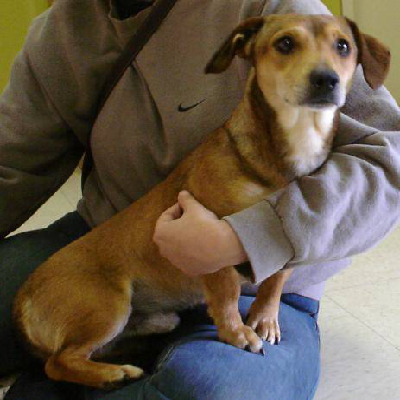

In [34]:
image_loc = 'dataset/training_set/dogs/dog.1280.jpg'
image.load_img(image_loc, target_size = (400, 400))

In [35]:
prediction(image_loc)

'dog'

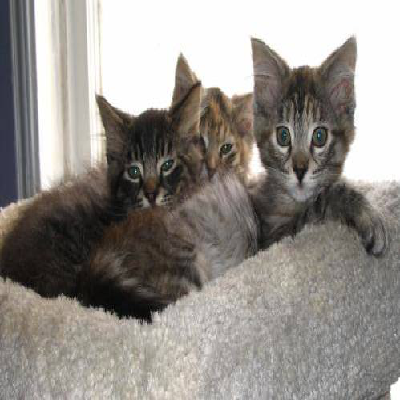

In [36]:
image_loc = 'dataset/training_set/cats/cat.1441.jpg'
image.load_img(image_loc, target_size = (400, 400))

In [37]:
prediction(image_loc)

'cat'